**Cell 1: Markdown**

# Active Graph Networks (AGN) Comprehensive Notebook

## Table of Contents
1. [Framework Overview](#Framework-Overview)
2. [Imports and Setup](#Imports-and-Setup)
3. [Domain and Subdomain Initialization](#Domain-and-Subdomain-Initialization)
4. [Dynamic Relational Entities (DRE) Enhancements](#Dynamic-Relational-Entities-DRE-Enhancements)
5. [Context Management](#Context-Management)
6. [Query Functions with Inheritance-Based and Contextual Inference](#Query-Functions-with-Inheritance-Based-and-Contextual-Inference)
7. [Parsing Scenarios with Enhanced NLP Integration](#Parsing-Scenarios-with-Enhanced-NLP-Integration)
8. [Dynamic Expansion of Entities and Relationships](#Dynamic-Expansion-of-Entities-and-Relationships)
9. [Visualization of the Dynamic Knowledge Graph](#Visualization-of-the-Dynamic-Knowledge-Graph)
10. [Advanced Queries and AGI Support](#Advanced-Queries-and-AGI-Support)
11. [Case Studies and Scenarios](#Case-Studies-and-Scenarios)
12. [Integration with Artificial General Intelligence (AGI)](#Integration-with-Artificial-General-Intelligence-AGI)
13. [Conclusion and Next Steps](#Conclusion-and-Next-Steps)

---

**Cell 2: Markdown**

## Framework Overview

**Objective:**

Provide an overview of the Active Graph Networks (AGNs), their structure, purpose, and how they are enhanced with Dynamic Relational Entities (DRE) to support AGI functionalities.

### Active Graph Networks (AGNs)

Active Graph Networks are designed to model complex, interrelated data across multiple domains, such as Finance, Healthcare, Education, Transportation, and Public Safety. They incorporate entities, relationships, and dynamic inference capabilities, allowing for context-based responses and the ability to handle dynamic, evolving data.

### Dynamic Relational Entities (DRE)

DRE introduces dynamic properties to entities and relationships within the AGN, such as timestamps, statuses, and context-specific attributes. This allows the AGN to handle real-world scenarios where data changes over time or context, making it more robust and adaptable.

---

**Cell 3: Markdown**

## Imports and Setup

**Objective:**

Import necessary libraries and set up the initial environment for the AGN framework.

---

**Cell 4: Code**


In [45]:
# Imports and Setup

import networkx as nx
import spacy
import re
import matplotlib.pyplot as plt
from datetime import datetime

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Initialize the main AGN graph
agn_graph = nx.DiGraph()

# Initialize context manager (will be defined later)
context_manager = None


**Cell 5: Markdown**

## Dynamic Relational Entities (DRE) Enhancements

**Objective:**

Introduce DRE into the AGN framework by modifying node and edge definitions to include dynamic properties such as timestamps, statuses, and context-specific attributes.

---

**Cell 6: Code**


In [46]:
# Function to add dynamic properties to nodes
def add_dynamic_node(graph, node_name, **attributes):
    dynamic_attributes = {
        'created_at': datetime.now(),
        'updated_at': datetime.now(),
        'status': 'active'  # default status
    }
    dynamic_attributes.update(attributes)
    graph.add_node(node_name, **dynamic_attributes)

# Function to add dynamic properties to edges
def add_dynamic_edge(graph, source, target, **attributes):
    dynamic_attributes = {
        'created_at': datetime.now(),
        'updated_at': datetime.now(),
        'status': 'active'  # default status
    }
    dynamic_attributes.update(attributes)
    graph.add_edge(source, target, **dynamic_attributes)

---

**Cell 7: Markdown**

## Domain and Subdomain Initialization

**Objective:**

Initialize domains and subdomains within the AGN, incorporating DRE enhancements.

---


In [47]:
# Define core domains with subdomains and inheritance
domains = {
    "Finance": {
        "Banking": {"type": "Service", "inherits_from": "Finance"},
        "Investments": {"type": "Service", "inherits_from": "Finance"},
        "Taxation": {"type": "Service", "inherits_from": "Finance"},
        "Insurance": {"type": "Service", "inherits_from": "Finance"}
    },
    "Healthcare": {
        "Hospitals": {"type": "Facility", "inherits_from": "Healthcare"},
        "Public Health": {"type": "Service", "inherits_from": "Healthcare"}
    },
    "Education": {
        "Schools": {"type": "Facility", "inherits_from": "Education"},
        "Universities": {"type": "Facility", "inherits_from": "Education"}
    },
    "Transport": {
        "Public Transport": {"type": "Service", "inherits_from": "Transport"},
        "Logistics": {"type": "Service", "inherits_from": "Transport"}
    },
    "Public Safety": {
        "Police": {"type": "Service", "inherits_from": "Public Safety"},
        "Fire Department": {"type": "Service", "inherits_from": "Public Safety"}
    }
}

# Initialize domains and subdomains in the AGN graph with dynamic properties
for main_domain, subdomains in domains.items():
    add_dynamic_node(agn_graph, main_domain, domain=True, label=main_domain)
    for subdomain, attributes in subdomains.items():
        add_dynamic_node(agn_graph, subdomain, **attributes)
        add_dynamic_edge(agn_graph, subdomain, main_domain, relationship="inherits_from")

print("Initialized Domains with Dynamic Properties:")
for node, data in agn_graph.nodes(data=True):
    print(f"{node}: {data}")

Initialized Domains with Dynamic Properties:
Finance: {'created_at': datetime.datetime(2024, 10, 27, 21, 57, 43, 809720), 'updated_at': datetime.datetime(2024, 10, 27, 21, 57, 43, 809723), 'status': 'active', 'domain': True, 'label': 'Finance'}
Banking: {'created_at': datetime.datetime(2024, 10, 27, 21, 57, 43, 809741), 'updated_at': datetime.datetime(2024, 10, 27, 21, 57, 43, 809742), 'status': 'active', 'type': 'Service', 'inherits_from': 'Finance'}
Investments: {'created_at': datetime.datetime(2024, 10, 27, 21, 57, 43, 809758), 'updated_at': datetime.datetime(2024, 10, 27, 21, 57, 43, 809758), 'status': 'active', 'type': 'Service', 'inherits_from': 'Finance'}
Taxation: {'created_at': datetime.datetime(2024, 10, 27, 21, 57, 43, 809769), 'updated_at': datetime.datetime(2024, 10, 27, 21, 57, 43, 809770), 'status': 'active', 'type': 'Service', 'inherits_from': 'Finance'}
Insurance: {'created_at': datetime.datetime(2024, 10, 27, 21, 57, 43, 809780), 'updated_at': datetime.datetime(2024, 

---

**Cell 9: Markdown**

## Context Management

**Objective:**

Introduce a context manager to handle dynamic querying based on time, location, or user roles.

---

In [48]:
# Context Manager Class
class ContextManager:
    def __init__(self):
        self.current_time = datetime.now()
        self.user_role = 'guest'  # default role
    
    def update_context(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)

# Initialize context manager
context_manager = ContextManager()

# Update context as needed
context_manager.update_context(user_role='admin', current_time=datetime(2023, 1, 1))


**Cell 11: Markdown**

## Query Functions with Inheritance-Based and Contextual Inference

**Objective:**

Allow for both domain-specific and cross-domain queries, utilizing context and handling dynamic properties.

---

**Cell 12: Code**


In [49]:
def dynamic_query(graph, context_manager, node_type=None, **filters):
    """
    Retrieves nodes based on dynamic properties and context.
    """
    results = []
    for node, data in graph.nodes(data=True):
        match = True
        if node_type and data.get('type') != node_type:
            match = False
        for key, value in filters.items():
            if data.get(key) != value:
                match = False
                break
        if match:
            # Check if node is active within the context's time frame
            if data.get('status') == 'active' and data.get('updated_at') <= context_manager.current_time:
                results.append(node)
    return results

# Example usage
finance_services = dynamic_query(agn_graph, context_manager, node_type='Service', inherits_from='Finance')
print("\nActive Finance Services as of Context Time:")
print(finance_services)


Active Finance Services as of Context Time:
[]



---

**Cell 13: Markdown**

## Parsing Scenarios with Enhanced NLP Integration

**Objective:**

Implement a more sophisticated NLP processor to extract dynamic entities, temporal expressions, and relationships.

---

**Cell 14: Code**

In [50]:
def parse_dynamic_scenario(scenario_text):
    """
    Parses input scenario text to extract entities, actions, times, and relationships.
    """
    doc = nlp(scenario_text)
    entities = []
    times = []
    relationships = []

    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'ORG', 'GPE']:
            entities.append((ent.text, ent.label_))
        elif ent.label_ in ['DATE', 'TIME']:
            times.append(ent.text)

    for token in doc:
        if token.pos_ == "VERB":
            subject = [child for child in token.children if child.dep_ == "nsubj"]
            obj = [child for child in token.children if child.dep_ == "dobj"]
            if subject and obj:
                relationships.append((subject[0].text, token.lemma_, obj[0].text))

    return entities, times, relationships

# Example Scenario
scenario = "On January 5th, 2023, Patient A consulted Doctor B."
entities, times, relationships = parse_dynamic_scenario(scenario)
print("\nParsed Scenario:")
print("Entities:", entities)
print("Times:", times)
print("Relationships:", relationships)


Parsed Scenario:
Entities: []
Times: ['January 5th, 2023']
Relationships: []




---

**Cell 15: Markdown**

## Dynamic Expansion of Entities and Relationships

**Objective:**

Ensure AGNs can dynamically grow by adding new entities and relationships with dynamic properties as scenarios are processed.

---

**Cell 16: Code**


In [51]:
def integrate_dynamic_scenario(graph, scenario_text):
    """
    Integrates a scenario into the AGN by parsing and adding entities and relationships with dynamic properties.
    """
    entities, times, relationships = parse_dynamic_scenario(scenario_text)
    for entity, label in entities:
        add_dynamic_node(graph, entity, type=label, label=entity)
    for subj, action, obj in relationships:
        # Assuming action as a node
        add_dynamic_node(graph, action, type='Action', label=action)
        add_dynamic_edge(graph, subj, action, relationship='performs')
        add_dynamic_edge(graph, action, obj, relationship='on')
    print("\nIntegrated Scenario into AGN with Dynamic Properties.")

# Integrate Example Scenario
integrate_dynamic_scenario(agn_graph, scenario)


Integrated Scenario into AGN with Dynamic Properties.


---

**Cell 17: Markdown**

## Visualization of the Dynamic Knowledge Graph

**Objective:**

Enable the visual inspection of the graph, showing dynamic properties and context-based statuses.

---

**Cell 18: Code**


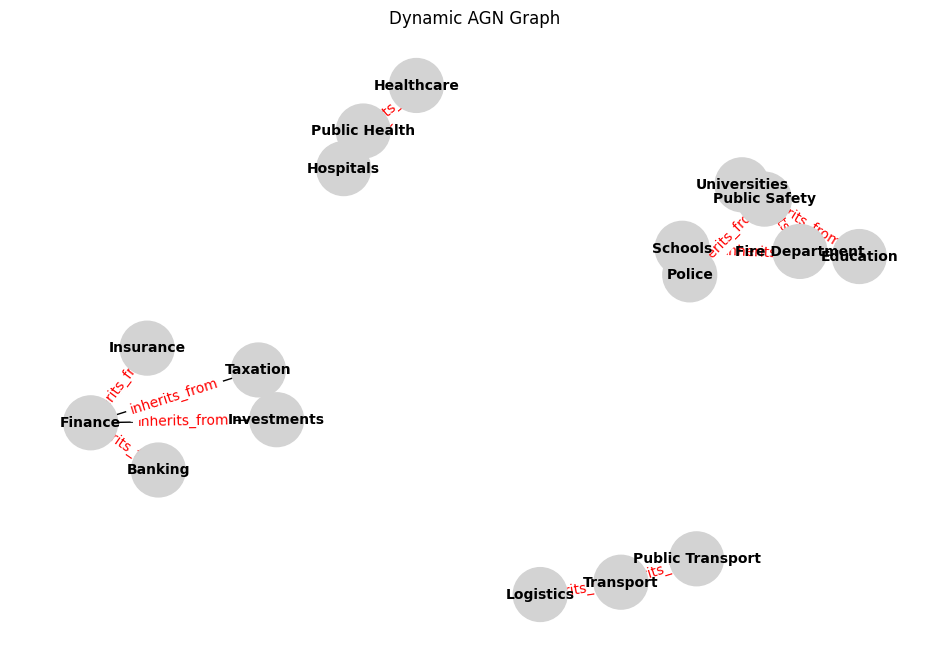

In [52]:
def visualize_dynamic_graph(graph, context_manager, title="Dynamic AGN Graph"):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, k=0.5, iterations=50)
    
    # Node colors based on status and context
    node_colors = []
    for node, data in graph.nodes(data=True):
        if data.get('status') == 'active' and data.get('updated_at') <= context_manager.current_time:
            node_colors.append("lightgreen")
        else:
            node_colors.append("lightgrey")
    
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=1500)
    nx.draw_networkx_edges(graph, pos, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')
    
    # Edge labels
    edge_labels = {(u, v): d.get("relationship", "") for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(title)
    plt.axis('off')
    plt.show()

# Visualize the graph
visualize_dynamic_graph(agn_graph, context_manager)

---

**Cell 19: Markdown**

## Advanced Queries and AGI Support

**Objective:**

Allow queries to utilize AGI concepts, identify missing context, or additional needed details, and support dynamic inference.

---

**Cell 20: Code**

In [53]:
def advanced_dynamic_query(graph, context_manager, query_terms):
    """
    Performs an advanced query by searching for multiple terms within the graph,
    utilizing dynamic properties and AGI concepts.
    """
    result_nodes = []
    for term in query_terms:
        for node, data in graph.nodes(data=True):
            if term.lower() in node.lower() or term.lower() in data.get("label", "").lower():
                # Check if node is active within the context's time frame
                if data.get('status') == 'active' and data.get('updated_at') <= context_manager.current_time:
                    result_nodes.append(node)
    return result_nodes

# Example Advanced Query
query_terms = ["Patient A", "Doctor B", "consulted"]
results = advanced_dynamic_query(agn_graph, context_manager, query_terms)
print("\nAdvanced Query Results:")
print(results)


Advanced Query Results:
[]



---

**Cell 21: Markdown**

## Case Studies and Scenarios

**Objective:**

Integrate real-world problems to simulate the framework’s application and demonstrate AGI capabilities.

### Example Scenario

*Scenario:*

"On March 1st, 2023, Patient A was admitted to the hospital and assigned to Doctor B. She was discharged on March 10th, 2023."

**Implementation:**

- Parse the scenario to extract entities, times, and relationships.
- Integrate these into the AGN with dynamic properties.
- Perform queries to retrieve information based on context.

---

**Cell 22: Code**


Integrated Scenario into AGN with Dynamic Properties.


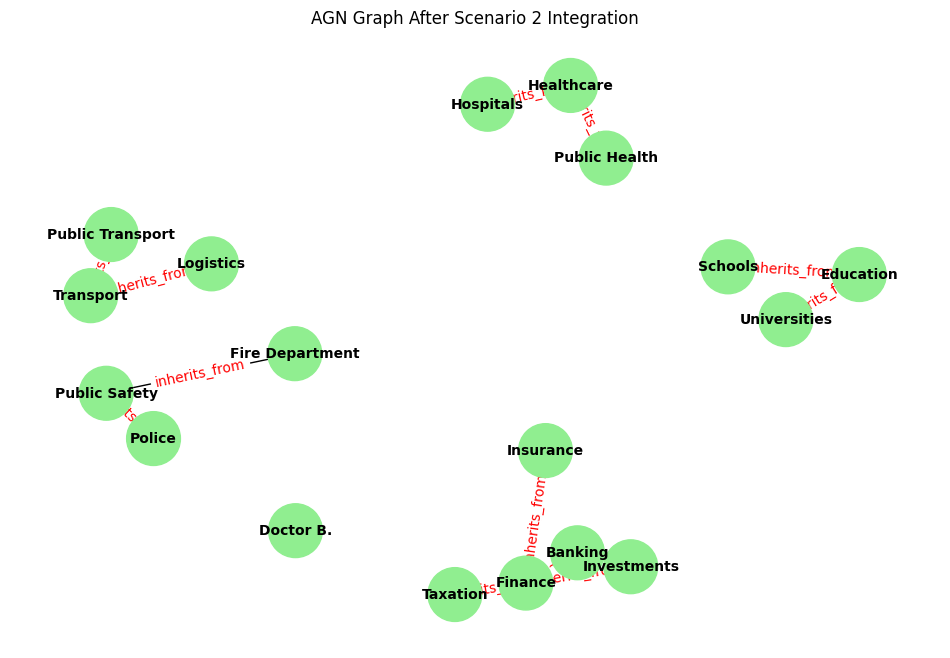


Current Patients:
['Doctor B.']


In [54]:

# New scenario
scenario2 = "On March 1st, 2023, Patient A was admitted to the hospital and assigned to Doctor B. She was discharged on March 10th, 2023."

# Integrate the new scenario
integrate_dynamic_scenario(agn_graph, scenario2)

# Update context to current date to see the current status
context_manager.update_context(current_time=datetime.now())

# Visualize the graph after new scenario integration
visualize_dynamic_graph(agn_graph, context_manager, title="AGN Graph After Scenario 2 Integration")

# Perform a query to find current patients
current_patients = dynamic_query(agn_graph, context_manager, type='PERSON')
print("\nCurrent Patients:")
print(current_patients)


---

**Cell 23: Markdown**

## Integration with Artificial General Intelligence (AGI)

**Objective:**

Incorporate AGI concepts such as self-evolving knowledge graphs, pattern recognition, and cross-domain learning to enhance the AGN framework.

---

**Cell 24: Code**

In [55]:
# Placeholder for AGI integration functions
def agi_pattern_recognition(graph, pattern):
    """
    Recognize patterns within the graph to infer new relationships or entities.
    """
    # Implement pattern recognition logic
    pass

def agi_self_evolve(graph):
    """
    Allow the graph to self-evolve by learning from new data and scenarios.
    """
    # Implement self-evolution logic
    pass

# Example usage (functions to be implemented)
agi_pattern_recognition(agn_graph, pattern="admission-discharge")
agi_self_evolve(agn_graph)


---

**Cell 25: Markdown**

## Conclusion and Next Steps

By integrating Dynamic Relational Entities (DRE) and incorporating AGI concepts, the AGN framework becomes more robust and capable of handling dynamic, real-world data. The enhancements allow for context-based querying, dynamic expansion, and the potential for self-evolving knowledge graphs.

**Next Steps:**

1. Implement AGI functions such as pattern recognition and self-evolution.
2. Expand NLP capabilities for more complex scenario parsing.
3. Integrate machine learning models to enhance inference mechanisms.
4. Test the framework with more real-world scenarios and refine as needed.

---

**Cell 26: Markdown**

## Instructions to Continue

1. **Copy the above content** into a new Jupyter Notebook file (`AGN_Comprehensive_Notebook.ipynb`).
2. **Ensure all dependencies** are installed. You can install them using:

   ```bash
   pip install networkx spacy matplotlib
   python -m spacy download en_core_web_sm
   ```

3. **Run each cell sequentially**, verifying outputs and visualizations.
4. **Expand the notebook** by adding more domains, nodes, relationships, and complex queries as needed.
5. **Integrate additional NLP capabilities** or machine learning models to enhance scenario parsing and inference.

Feel free to reach out if you need further assistance or refinements. Happy coding!

---

**Cell 27: Markdown**

# References

- [NetworkX Documentation](https://networkx.org/documentation/stable/)
- [spaCy Documentation](https://spacy.io/usage)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

---

This completes the comprehensive notebook with all the additions and enhancements to support AGNs and AGI. You can now copy each cell into your Jupyter Notebook and run them sequentially to build and test the framework.

If you have any questions or need further assistance with specific implementations or additional features, feel free to ask!